# Data Wrangling


In [1]:
%%capture
!pip install eli5 


In [2]:
##Load Data
import numpy as np
import pandas as pd

#SambnisImp_DATASET = "https://raw.githubusercontent.com/clementchaffard/ADA_public/main/SambnisImp.csv?token=AKSPC2DOISXCHDXUGZA6LDS7TPHWI"
#SambnisImp = pd.read_csv(SambnisImp_DATASET)
SambnsisImp=pd.read_csv("SambnisImp.csv",usecols =["warstds", "ager", "agexp", "anoc", "army85", "autch98",
             "auto4","autonomy", "avgnabo", "centpol3", "coldwar", "decade1",
             "decade2","decade3", "decade4", "dem", "dem4", "demch98", "dlang",
             "drel", "durable","ef", "ef2", "ehet", "elfo", "elfo2", "etdo4590",
             "expgdp", "exrec","fedpol3", "fuelexp", "gdpgrowth", "geo1", "geo2",
             "geo34", "geo57","geo69", "geo8", "illiteracy", "incumb", "infant",
             "inst", "inst3", "life","lmtnest", "ln_gdpen", "lpopns", "major", "manuexp",
             "milper", "mirps0","mirps1", "mirps2", "mirps3", "nat_war", "ncontig",
             "nmgdp", "nmdp4_alt","numlang", "nwstate", "oil", "p4mchg", "parcomp",
             "parreg", "part","partfree", "plural", "plurrel", "pol4", "pol4m", "pol4sq",
             "polch98","polcomp", "popdense", "presi", "pri", "proxregc", "ptime", "reg",
             "regd4_alt", "relfrac", "seceduc", "second", "semipol3", "sip2", "sxpnew","sxpsq",
             "tnatwar", "trade", "warhist", "xconst"],low_memory = False, header = 0)

In [3]:
%%capture
#Data Wrangling

War_binary = SambnsisImp.pop('warstds')
ArticleData =SambnsisImp
!pip install imbalanced-learn


In [4]:
##Split Train/Test
from sklearn.model_selection import train_test_split
ArticleData_train, ArticleData_test, War_binary_train, War_binary_test = train_test_split(ArticleData, War_binary, test_size=0.25,random_state=0)

In [6]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

X_over_train, X_over_test, y_over_train, y_over_test = ArticleData_train, ArticleData_test, War_binary_train, War_binary_test
#Feature scaling
scNN = StandardScaler()

X_over_train = scNN.fit_transform(X_over_train)
X_over_test = scNN.fit_transform(X_over_test)

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.3)
# fit and apply the transform
X_over_train, y_over_train = oversample.fit_resample(X_over_train, y_over_train)



In [7]:
from imblearn.under_sampling import RandomUnderSampler
import imblearn

X_under_train, X_under_test, y_under_train, y_under_test = ArticleData_train, ArticleData_test, War_binary_train, War_binary_test
#Feature scaling
scNN = StandardScaler()

X_under_train = scNN.fit_transform(X_under_train)
X_under_test = scNN.fit_transform(X_under_test)
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy=0.3)
# fit and apply the transform
X_under_train, y_under_train = undersample.fit_resample(X_under_train, y_under_train)



# Feature Scaling
Feature scaling is essential for machine learning algorithms that calculate distances between data. If not scaled, the feature with a higher value range starts dominating when calculating distances. This is especially important in SVM where non-scaled data would have a devastating effect on the results. 
Therefore, we chose to use feature scaling for neural network.


In [8]:
#Feature scaling

scNN = StandardScaler()
ArticleData_train = scNN.fit_transform(ArticleData_train)
ArticleData_test = scNN.fit_transform(ArticleData_test)

# Neural Network

Single neuron:

Step 1: For each input, multiply the input value xᵢ with weights wᵢ and sum all the multiplied values. Weights represent the strength of the connection between neurons and decides how much influence the given input will have on the neuron’s output.

$\sum = x.w$

Step 2: Add bias b to the summation of multiplied values
$z = x.w + b$

Step 3: introduce non-linearity into the output of the neurons

$\hat y = \sigma(z) = \frac{1}{1 + \exp(-z)}$

Backpropagation: computing the gradient of the loss function with respect to the weights
Step 1: Loss function is calculated for the entire training dataset and their average is called the Cost function C using mean squared error: 

$C = MSE = \frac{1}{n}\sum(y_i-\hat y_i)^2$

Step 2: In order to find the best weights and bias for our Perceptron, we need to know how the cost function changes in relation to weights and bias. Using partial derivation, we obtain: 

$\frac{\partial C}{\partial w_i} = \frac{2}{n} \times sum(y - \hat y)\times \sigma (z) \times (1 - \sigma (z)) \times x_i $


$\frac{\partial C}{\partial b} = \frac{2}{n} \times sum(y - \hat y) \times \sigma (z) \times (1 - \sigma (z)) $

Optimization:
The weights and bias are updated as follows and the backpropagation and gradient descent is repeated until convergence. 

$w_i = w_i - (\alpha \times \frac{\partial C}{\partial w_i})$


$b = b - (\alpha \times \frac{\partial C}{\partial b})$



In [9]:
#Neural Network Model
from sklearn.neural_network import MLPClassifier
NNclf = MLPClassifier(random_state=1, max_iter=300).fit(ArticleData_train, War_binary_train) #adam best solver for large dataset

NN_pred = NNclf.predict_proba(ArticleData_test)[:,1]

#clf.score(X_test, y_test)

#Tuning hyperparameters using crossvalidation
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['adam'], 'max_iter': [300,500,1000]}#, 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(5, 12), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf_grid = GridSearchCV(NNclf, parameters, n_jobs=-1)

best_param = clf_grid.fit(ArticleData, War_binary)

best_param

GridSearchCV(estimator=MLPClassifier(max_iter=300, random_state=1), n_jobs=-1,
             param_grid={'max_iter': [300, 500, 1000], 'solver': ['adam']})

# Support Vector Machine (SVM)

The SVM model is a model that will try to find a hyperplane in an N-dimensional space (with N the number of features) that distinctly classifies the data points. 
Some data points will be identified during the training phase as points that matter for defining the boundary between two classes, they are the points that lie at the border between the classes. These points are called support vectors. The distance between the hyperplane and each support vector is calculated and the algorithm will try to maximize the distance in order to have the clearest possible boundary. 
The distance between data points is measured by the Gaussian kernel:
$$k_{rbf}(x_1, x_2) = e^{\gamma \lVert x_1 - x_2 \rVert^{2}}$$ 

where $x_1$ and $x_2$ are data points and $\lVert x_1 - x_2 \rVert$ the Euclidean distance.

We will use cross-validation to find the best hyperplane according to the auc score of the roc curve. We will test different C and $\gamma$. The gamma parameter is the one shown in the formula above, which controls the width of the Gaussian kernel. It determines the scale of what it means for points to be close together. The C parameter is a regularization parameter, similar to that used in the linear models. It limits the importance of each point.



In [10]:
## Modele SVM
from sklearn.model_selection import KFold
from sklearn import svm
# Generate a random dataset
#ArticleData_train, ArticleData_test, War_binary_train, War_binary_test = skl.model_selection.train_test_split(ArticleData, War_binary, test_size=0.6, random_state=42)

cv = KFold(n_splits=3, shuffle=True, random_state=0)
param_grid = [{"kernel": ["rbf"], "C": [1, 10, 100,1000], "gamma": [50,1,0.001, 0.0001],"probability" : [True]} ]
grd = GridSearchCV(svm.SVC(), param_grid, scoring='roc_auc', cv=cv, n_jobs = -1, refit = True)

#Training
War_binary_pred = grd.fit(ArticleData_train, War_binary_train).predict_proba(ArticleData_test)[:,1]
best_param = grd.cv_results_['params'][grd.best_index_]
best_param

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf', 'probability': True}

# Random Forest

Random forests construct many individual decision trees during training. Predictions from all trees are pooled to make the final prediction.
Implementation in Scikit-learn
For each decision tree, Scikit-learn calculates a nodes importance using Gini Importance, assuming only two child nodes (binary tree):

$$ni_j = w_jC_j - w_{left(j)}C_{left(j)} - w_{right(j)}C_{right(j)}$$

- $ni_j$ = the importance of node j
- $w_j$ = weighted number of samples reaching node j
- $C_j$ = the impurity value of node j
- left(j) = child node from left split on node j
- right(j) = child node from right split on node j

The importance for each feature on a decision tree is then calculated as:

$$fi_i = \frac{\sum _{j:node j splits on feature i}ni_j }{\sum _{k \in all nodes}ni_k}$$

- $fi_i$ = the importance of feature i

- $ni_j$ = the importance of node j
These can then be normalized to a value between 0 and 1 by dividing by the sum of all feature importance values.

 
The final feature importance, at the Random Forest level, is it’s average over all the trees. The sum of the feature’s importance value on each trees is calculated and divided by the total number of trees:

$$RFfi_i = \frac{\sum _{j\in all trees}normfi_{ij}}{T}$$
 
- $RFfi_i$ = the importance of feature i calculated from all trees in the Random Forest model
- $normfi_{ij}$ = the normalized feature importance for i in tree j
- T = total number of trees



In [11]:
#RF Model
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators': 1000,
              'random_state': 0} 

RFmodel = RandomForestClassifier(**parameters)
RFmodel.fit(ArticleData_train, War_binary_train)
probas = RFmodel.predict_proba(ArticleData_test)
#keeping the positive outcomes
probas = probas[:, 1]


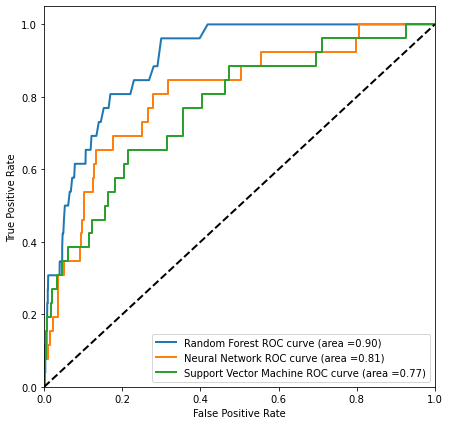

In [12]:
## ROC curve
import matplotlib.pyplot as plt
from sklearn import metrics

def plot_roc(y_test, y_pred,names,filename):
    plt.figure(figsize = [7,7])
    for i in range(len(y_pred)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred[i], pos_label=1)
        roc_auc = metrics.auc(fpr, tpr)
        lw = 2
        plt.plot(fpr, tpr, lw=lw, label=names[i] + ' ROC curve (area ={0:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.savefig('roc'+filename, bbox_inches='tight')
    plt.show();
    
predictions = np.vstack((probas,NN_pred,War_binary_pred))
names = ["Random Forest","Neural Network", "Support Vector Machine"]
plot_roc(War_binary_test,predictions,names,'normal')


# Roc curves with over- and undersampling

### Oversampling

In [14]:
#Neural Network Model

NNclf_over = MLPClassifier(random_state=1, max_iter=300).fit(X_over_train, y_over_train) #adam best solver for large dataset
NN_pred_over = NNclf_over.predict_proba(X_over_test)[:,1]
parameters = {'solver': ['adam'], 'max_iter': [300,500,1000]}#, 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(5, 12), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf_grid_over = GridSearchCV(NNclf_over, parameters, n_jobs=-1)
best_param_over = clf_grid_over.fit(X_over_train, y_over_train)

#SVM
cv = KFold(n_splits=3, shuffle=True, random_state=0)
param_grid = [{"kernel": ["rbf"], "C": [1, 10, 100,1000], "gamma": [50,1,0.001, 0.0001],"probability" : [True]} ]
grd_over = GridSearchCV(svm.SVC(), param_grid, scoring='roc_auc', cv=cv, n_jobs = -1, refit = True)
y_over_pred = grd_over.fit(X_over_train, y_over_train).predict_proba(X_over_test)[:,1]
best_param_svm = grd_over.cv_results_['params'][grd_over.best_index_]

#RF
parameters = {'n_estimators': 1000,
              'random_state': 0} 
RFmodel_over = RandomForestClassifier(**parameters)
RFmodel_over.fit(X_over_train, y_over_train)
probas_over = RFmodel_over.predict_proba(X_over_test)
probas_over = probas_over[:, 1]


### Undersampling

In [17]:
#Neural Network Model

NNclf_under = MLPClassifier(random_state=1, max_iter=300).fit(X_under_train, y_under_train) #adam best solver for large dataset
NN_pred_under = NNclf_under.predict_proba(X_under_test)[:,1]
parameters = {'solver': ['adam'], 'max_iter': [300,500,1000]}#, 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(5, 12), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf_grid_under = GridSearchCV(NNclf_under, parameters, n_jobs=-1)
best_param_under = clf_grid_under.fit(X_under_train, y_under_train)

#SVM
cv = KFold(n_splits=3, shuffle=True, random_state=0)
param_grid = [{"kernel": ["rbf"], "C": [1, 10, 100,1000], "gamma": [50,1,0.001, 0.0001],"probability" : [True]} ]
grd_under = GridSearchCV(svm.SVC(), param_grid, scoring='roc_auc', cv=cv, n_jobs = -1, refit = True)
y_under_pred = grd_under.fit(X_under_train, y_under_train).predict_proba(X_under_test)[:,1]
best_param_svm = grd_under.cv_results_['params'][grd_under.best_index_]

#RF
parameters = {'n_estimators': 1000,
              'random_state': 0} 
RFmodel_under = RandomForestClassifier(**parameters)
RFmodel_under.fit(X_under_train, y_under_train)
probas_under = RFmodel_under.predict_proba(X_under_test)
probas_under = probas_under[:, 1]

/Users/Quentin/anaconda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Plotting the results

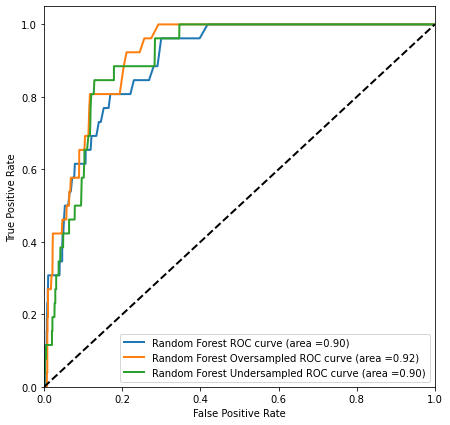

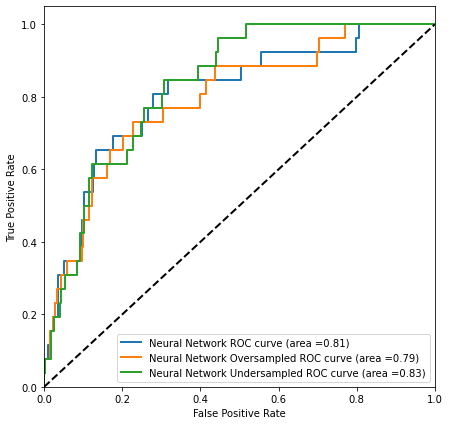

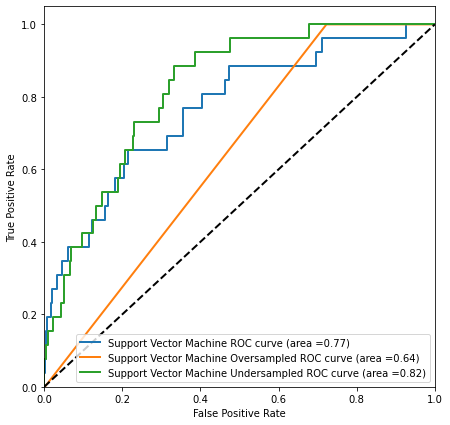

In [18]:
predictionsrf = [probas,probas_over,probas_under]
names = ["Random Forest","Random Forest Oversampled", "Random Forest Undersampled"]
plot_roc(y_under_test,predictionsrf,names,'Rf')


predictionsNN = [NN_pred,NN_pred_over,NN_pred_under]
names = ["Neural Network","Neural Network Oversampled", "Neural Network Undersampled"]
plot_roc(y_over_test,predictionsNN,names,'NN')

predictionssvm = [War_binary_pred,y_over_pred,y_under_pred]
names = ["Support Vector Machine","Support Vector Machine Oversampled", "Support Vector Machine Undersampled"]
plot_roc(War_binary_test,predictionssvm,names,'SVM')

# Features importance

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt

def plot_importance(Model,i) : 
    perm = PermutationImportance(Model).fit(ArticleData_test, War_binary_test)
    Features_df = eli5.formatters.as_dataframe.format_as_dataframe(eli5.explain_weights(perm, feature_names = SambnsisImp.columns.tolist(), top =20))
    
    plt.subplot(1,3,i)
    ax = sns.stripplot(x=Features_df['weight'], y=Features_df['feature'],size=10)
    ax.set(
           xlabel = "Features Score",
           ylabel="")
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    return Features_df

<function matplotlib.pyplot.show(close=None, block=None)>

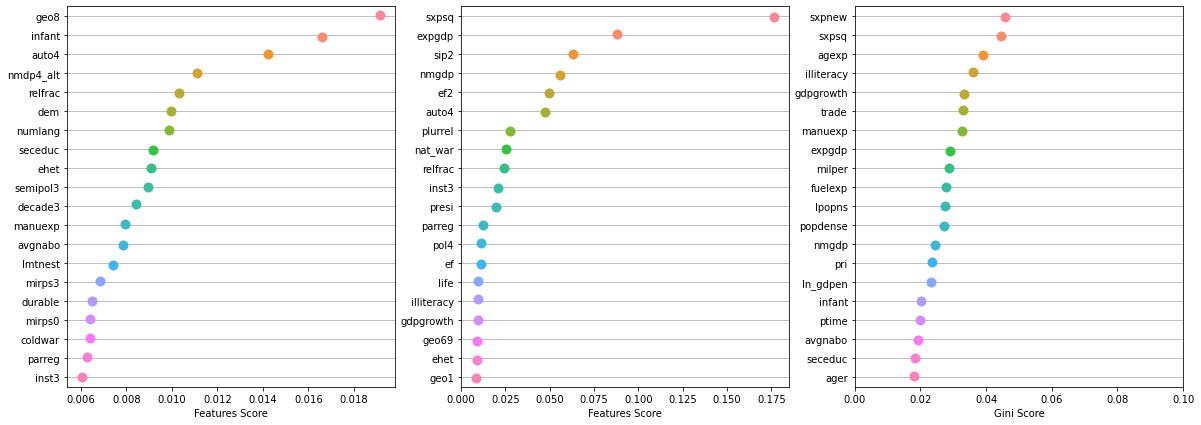

In [22]:

import eli5
from eli5.sklearn import PermutationImportance
plt.figure(figsize = [20,7])
Features_nn = plot_importance(clf_grid,1)
Features_svm = plot_importance(grd,2)

plt.subplot(1,3,3)
Ginidf = pd.DataFrame(RFmodel.feature_importances_,columns = ['value'])
Ginidf['name'] = ArticleData.columns
Ginidf.sort_values(by = ['value'],ascending=False,inplace=True)
Ginidf = Ginidf[:20]
ax = sns.stripplot(x=Ginidf['value'], y=Ginidf['name'],size=10)
ax.set(xlim = (0,0.1),
       xlabel = "Gini Score",
       ylabel="")
ax.xaxis.grid(False)
ax.yaxis.grid(True)
plt.savefig('feat_import', bbox_inches='tight')
plt.show


Permutation Importance
eli5 provides a way to compute feature importance for any black-box estimator by measuring how score decreases when a feature is not available. Score can represent accuracy, TPR, $R^2$ etc.
To avoid retraining the model for each feature, we replace the feature with a random noise in the test part and evaluate the score.
For this method to work the random noise must be of the same distribution as the original feature. To satisfy this, the random is generated by randomly shuffling the values of the feature in the test set.


# Common important features in the 3 models

In [23]:
def common_elements(list):
    result = np.zeros(len(list))
    i=0
    for element in list:
        result[i]=list.count(element)
        i=i+1
    return result

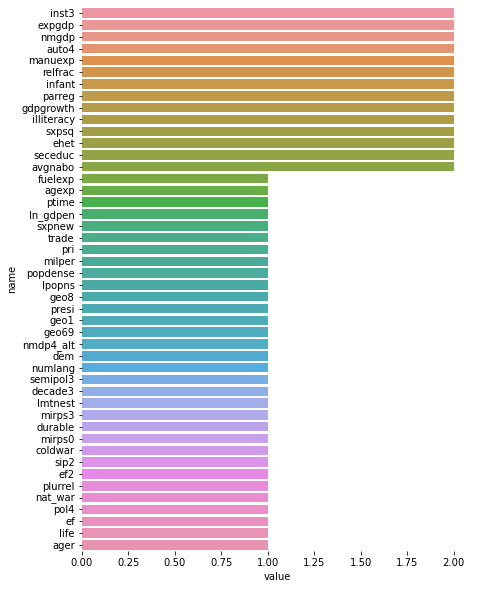

In [24]:
Feat = [Features_nn['feature'],Features_svm['feature'],Ginidf['name']]
t = np.asarray(Feat).tolist()
flatten = lambda t: [item for sublist in t for item in sublist]
feat_names = flatten(t)
common = common_elements(feat_names)

sorted_feat = pd.DataFrame(common,columns = ['value'])
sorted_feat['name'] = feat_names
sorted_feat.sort_values(by = ['value'],ascending=False,inplace=True)

plt.figure(figsize = [7,10])
sns.barplot(x=sorted_feat['value'], y=sorted_feat['name'])
sns.despine(left=True, bottom=True)
plt.savefig('feat_imp_rank', bbox_inches='tight')